In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score


In [93]:
dataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

In [94]:
df= pd.read_csv("SeoulBikeData.csv").drop(["Date","Seasons","Holiday"], axis=1)
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [95]:
df.columns= dataset_cols

In [96]:
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [97]:
df= df.drop(["hour"], axis=1)

In [98]:
df.head()   #hour has been dropped

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


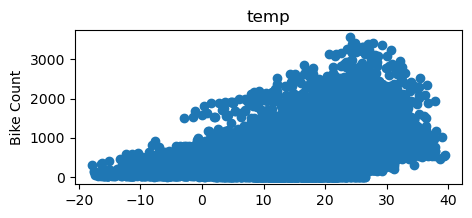

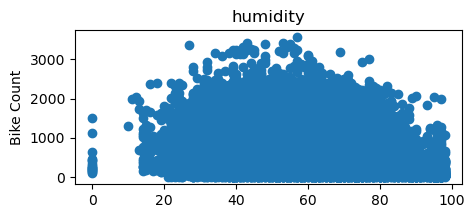

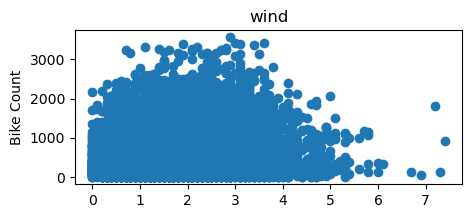

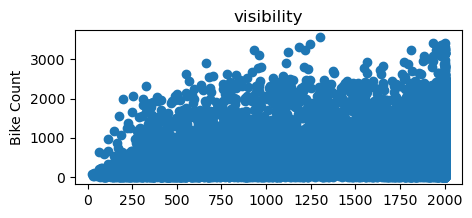

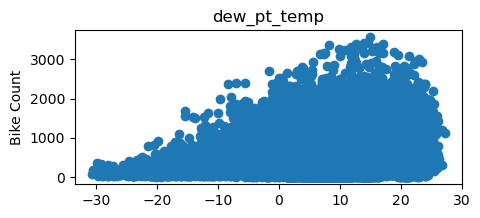

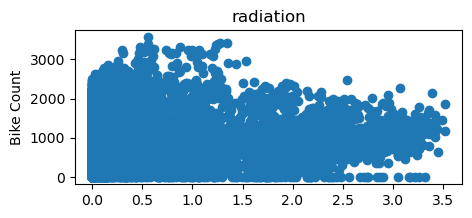

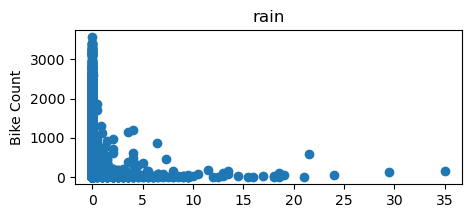

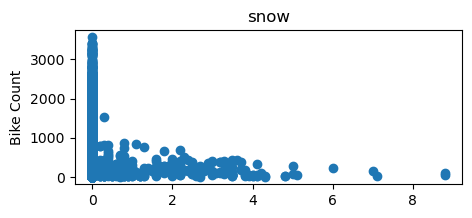

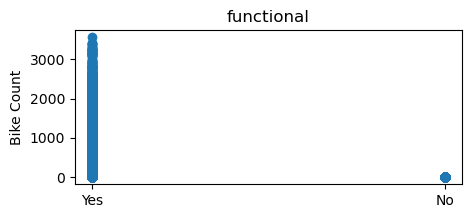

In [99]:
for label in df.columns[1:]:
    plt.figure(figsize=(5,2))
    plt.scatter(df[label], df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike Count")
    plt.show()

In [100]:
#from graphs its clearly visible that wind visibily and functional are kind of wastoff Linear Regression will'nt work properly
df= df.drop(["wind", "visibility", "functional"], axis=1)

In [101]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
0,254,-5.2,37,-17.6,0.0,0.0,0.0
1,204,-5.5,38,-17.6,0.0,0.0,0.0
2,173,-6.0,39,-17.7,0.0,0.0,0.0
3,107,-6.2,40,-17.6,0.0,0.0,0.0
4,78,-6.0,36,-18.6,0.0,0.0,0.0


In [102]:
#SPLITTING OF THE DATA
train, val, test= np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] )

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [103]:
def get_xy(dataframe, x_label, y_label):
    dataframe= copy.deepcopy(dataframe)
    if x_label is None:
       X= dataframe[ [c for c in dataframe.columns if c!=y_label] ].values   
    else:
        if len(x_label) == 1:
            X = dataframe[x_label[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_label].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [104]:
_, X_train_temp, y_train_temp= get_xy(train,["temp"], "bike_count")
_, X_val_temp, y_val_temp= get_xy(val,["temp"], "bike_count")
_, X_test_temp, y_test_temp= get_xy(test,["temp"], "bike_count")

#here it will give error if we will only pass "temp" coz it will treat it like an string not list and will give 1d array and we need a 2d array

In [105]:
temp_reg= LinearRegression() #using a linear regreesion model
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [106]:
y_predd= temp_reg.predict(X_test_temp)  #it has predicted but we cant use class_report coz its used for binary output here its regression or multiclass output

In [107]:
#we'll us r2 score
print(r2_score(y_test_temp, y_predd))

0.2858006806779465


In [109]:
#R² = 1.0 → perfect predictions
#R² = 0.0 → model does no better than just predicting the mean of y
#R² = 0.28 → model captures 28% of the pattern in the data; the rest is noise or unmodeled

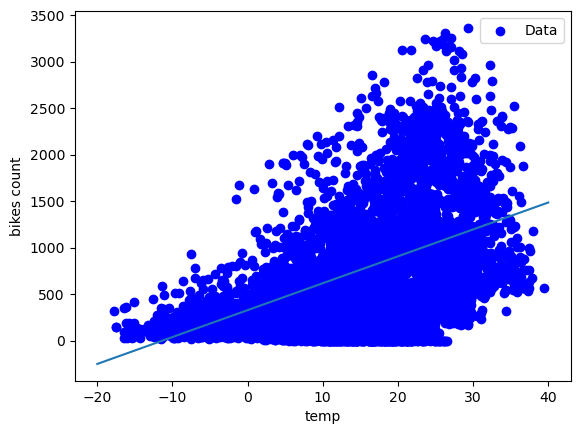

In [114]:
plt.scatter(X_train_temp, y_train_temp,label="Data", color="blue")
x = tf.linspace(-20, 40, 100)    #A TensorFlow 1D tensor containing 100 evenly spaced temperature values between -20 and 40.
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1,1)), color='Red)
plt.legend()
plt.xlabel("temp")
plt.ylabel("bikes count")
plt.legend()
plt.show()